<a href="https://colab.research.google.com/github/linashmyak/MLL/blob/main/ML6_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from sklearn import datasets
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import confusion_matrix, f1_score, accuracy_score

In [ ]:
df = pd.read_csv('mall_customers_clustering.csv', index_col=0)
df.head()

,CustomerID,Genre,Age,Income,Score
0,1,Male,19,15000,0.39
1,2,Male,21,15000,0.81
2,3,Female,20,16000,0.06
3,4,Female,23,16000,0.77
4,5,Female,31,17000,0.40


<Axes: xlabel='Income', ylabel='Score'>

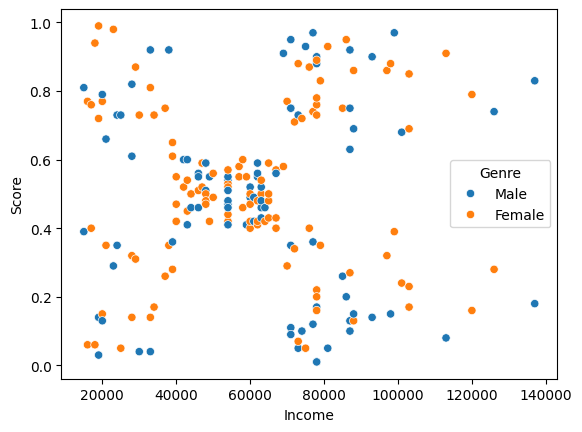

In [ ]:
sns.scatterplot(x='Income' , y='Score',data=df , hue='Genre')

In [ ]:
x = df.drop(["CustomerID"], axis=1)
X = pd.get_dummies(x)

## Кластеризация К-средних

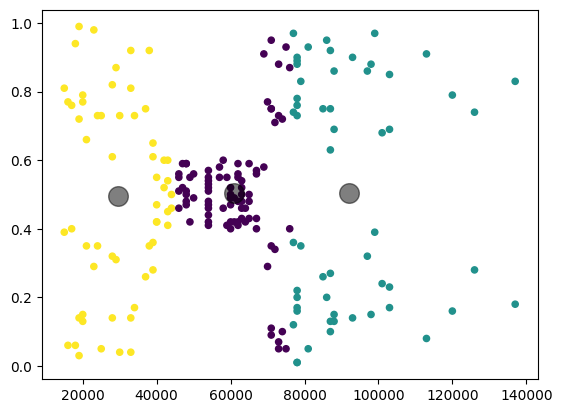

In [ ]:
from sklearn.cluster import KMeans

k_means = KMeans(n_clusters=3, random_state=42).fit(X)
y_kmeans = k_means.labels_
plt.scatter(x.Income, x.Score, c=y_kmeans, s=20, cmap='viridis')
centers = k_means.cluster_centers_
plt.scatter(centers[:, 1], centers[:, 2], c='black', s=200, alpha=0.5)

Используйте для визуализации результатов кластеризации другие пары признаков. Сделайте вывод о зависимости кластеризации от признаков. (Возраст, Доход)

Text(0.5, 1.0, 'Age vs Income')

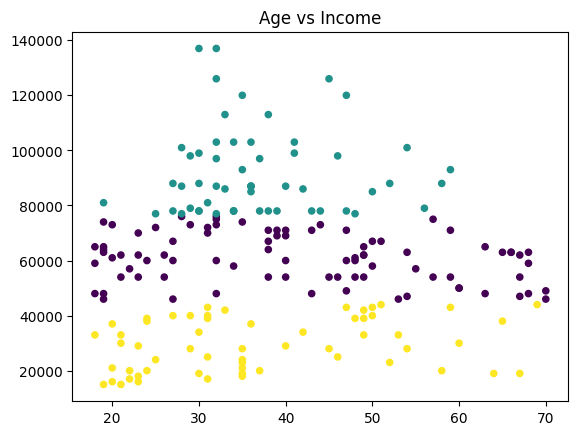

In [ ]:
plt.scatter(x.Age, x.Income, c=y_kmeans, s=20, cmap='viridis')
plt.title("Age vs Income")


## Для придания смысла кластерам выведите примеры точек выборки для каждого кластера. Сделайте вывод, чем они отличаются.

In [ ]:
x['Cluster'] = y_kmeans  # Добавляем колонку с метками кластеров

# Выводим примеры точек выборки для каждого кластера
for cluster in range(k_means.n_clusters):
    print(f"\nКластер {cluster}:")
    # Фильтруем данные по кластеру
    cluster_data = x[x['Cluster'] == cluster]
    print(cluster_data[['Income', 'Score']].head())



Кластер 0:
    Income  Score
58   46000   0.51
59   46000   0.46
60   46000   0.56
61   46000   0.55
62   47000   0.52

Кластер 1:
     Income  Score
144   77000   0.12
145   77000   0.97
146   77000   0.36
147   77000   0.74
148   78000   0.22

Кластер 2:
   Income  Score
0   15000   0.39
1   15000   0.81
2   16000   0.06
3   16000   0.77
4   17000   0.40


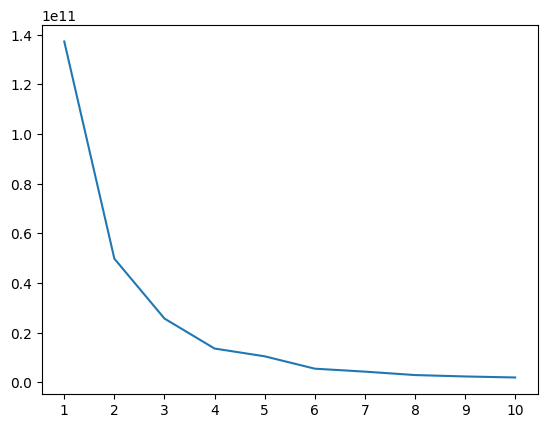

In [ ]:
wcss = []
for i in range(1,11):
	k_means = KMeans(n_clusters=i,random_state=42)
	k_means.fit(X)
	wcss.append(k_means.inertia_)
plt.plot(range(1,11),wcss)
plt.xticks(range(1,11))
_ = plt.show()

In [ ]:
k_means = KMeans(n_clusters=4, random_state=42).fit(X)
y_kmeans = k_means.labels_

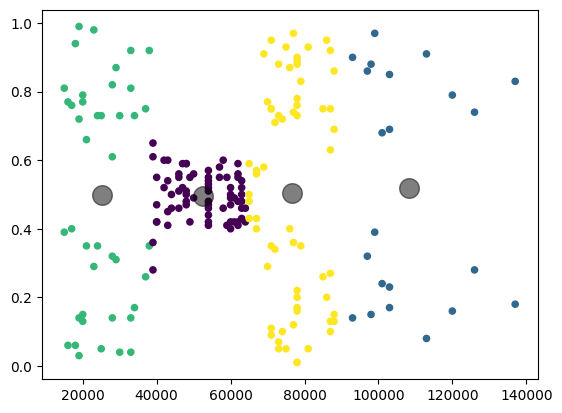

In [ ]:
plt.scatter(x.Income, x.Score, c=y_kmeans, s=20, cmap='viridis')
centers = k_means.cluster_centers_
plt.scatter(centers[:, 1], centers[:, 2], c='black', s=200, alpha=0.5)

Используйте для визуализации результатов кластеризации другие пары признаков. Сделайте вывод о зависимости кластеризации от признаков. (Возраст, очки)

Text(0.5, 1.0, 'Age vs Score')

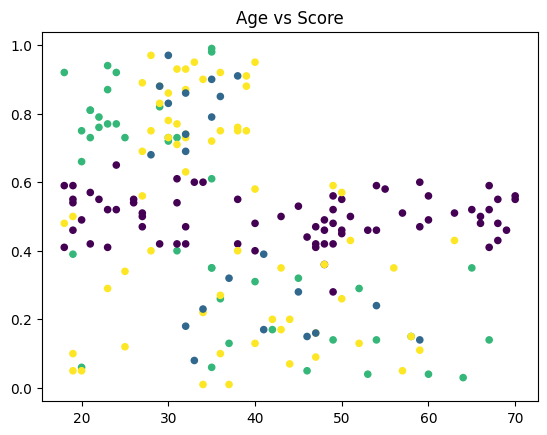

In [ ]:
plt.scatter(x.Age, x.Score, c=y_kmeans, s=20, cmap='viridis')
plt.title("Age vs Score")

In [ ]:
k_means = KMeans(n_clusters=8, random_state=42).fit(X)
y_kmeans = k_means.labels_

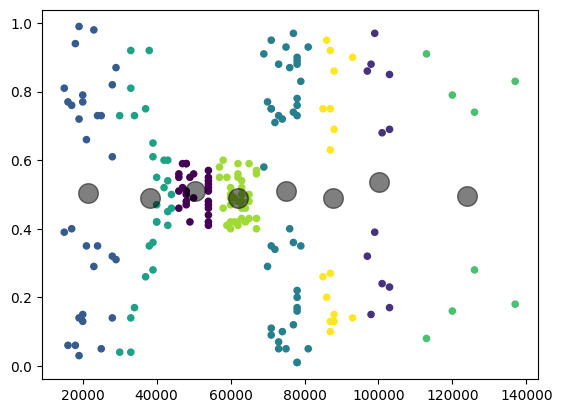

In [ ]:
plt.scatter(x.Income, x.Score, c=y_kmeans, s=20, cmap='viridis')
centers = k_means.cluster_centers_
plt.scatter(centers[:, 1], centers[:, 2], c='black', s=200, alpha=0.5)

## Нормализация признаков

In [ ]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler().fit(X)
X_scaled = scaler.transform(X)
X_scaled = pd.DataFrame(X_scaled, columns=X.columns)
X_scaled.head()

,Age,Income,Score,Genre_Female,Genre_Male
0,-1.424569,-1.738999,-0.434801,-1.128152,1.128152
1,-1.281035,-1.738999,1.195704,-1.128152,1.128152
2,-1.352802,-1.700830,-1.715913,0.886405,-0.886405
3,-1.137502,-1.700830,1.040418,0.886405,-0.886405
4,-0.563369,-1.662660,-0.395980,0.886405,-0.886405


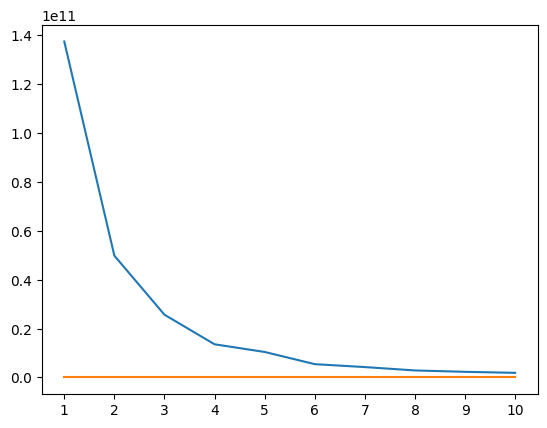

In [ ]:
unscaled, scaled = [], []
for i in range(1,11):
	unscaled.append(KMeans(n_clusters=i,random_state=42).fit(X).inertia_)
	scaled.append(KMeans(n_clusters=i,random_state=42).fit(X_scaled).inertia_)
plt.plot(range(1,11),unscaled)
plt.plot(range(1,11),scaled)
plt.xticks(range(1,11))
_ = plt.show()

In [ ]:
k_means = KMeans(n_clusters=4, random_state=42).fit(X_scaled)
y_kmeans = k_means.labels_

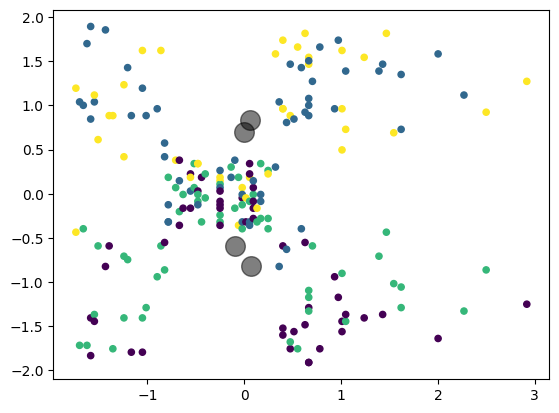

In [ ]:
plt.scatter(X_scaled['Income'],X_scaled['Score'], c=y_kmeans, s=20, cmap='viridis')
centers = k_means.cluster_centers_
plt.scatter(centers[:, 1], centers[:, 2], c='black', s=200, alpha=0.5)

In [ ]:
X_flat = X_scaled.drop(["Age", "Genre_Female", "Genre_Male"], axis=1)
X_flat.head()

,Income,Score
0,-1.738999,-0.434801
1,-1.738999,1.195704
2,-1.700830,-1.715913
3,-1.700830,1.040418
4,-1.662660,-0.395980


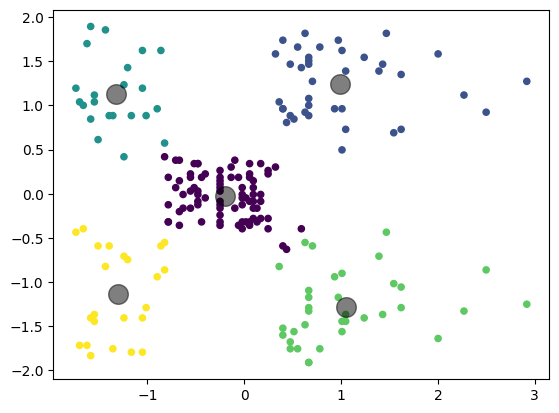

In [ ]:
k_means = KMeans(n_clusters=5, random_state=42).fit(X_flat)
y_kmeans = k_means.labels_
plt.scatter(X_flat['Income'],X_flat['Score'], c=y_kmeans, s=20, cmap='viridis')
centers = k_means.cluster_centers_
plt.scatter(centers[:, 0], centers[:, 1], c='black', s=200, alpha=0.5)




## Иерархическая кластеризация
Алгоритм К-средних работает вполне удовлетворительно на тех данных, которые мы анализировали в предыдущей части. Но есть и другие алгоритмы кластеризации, которые имеют свои особенности. Одним тех, которые часто требуются является алгоритм агломеративной кластеризации. Его особенность в том, что это иерархический метод. Он позволяет не только разбить выборку на определенное число кластеров, но и построить таксономию - то есть последовательное объединение кластеров также по принципу сходства.

In [ ]:
from sklearn.cluster import AgglomerativeClustering

model = AgglomerativeClustering(distance_threshold=0, n_clusters=None)
model = model.fit(X_scaled)

In [ ]:
from scipy.cluster.hierarchy import dendrogram

In [ ]:
def plot_dendrogram(model, **kwargs):
    counts = np.zeros(model.children_.shape[0])
    n_samples = len(model.labels_)
    for i, merge in enumerate(model.children_):
        current_count = 0
        for child_idx in merge:
            if child_idx < n_samples:
                current_count += 1  # leaf node
            else:
                current_count += counts[child_idx - n_samples]
        counts[i] = current_count

    linkage_matrix = np.column_stack(
        [model.children_, model.distances_, counts]
    ).astype(float)

    dendrogram(linkage_matrix, **kwargs)

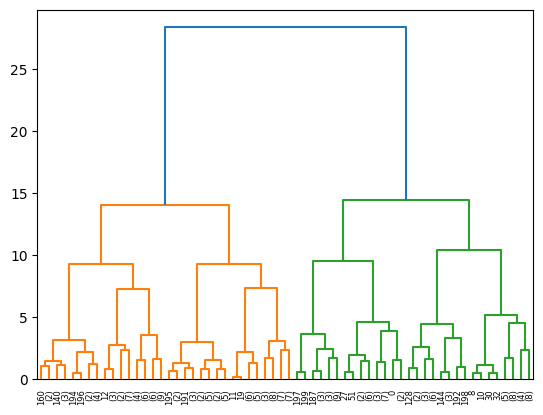

In [ ]:
plot_dendrogram(model, truncate_mode="level", p=5)

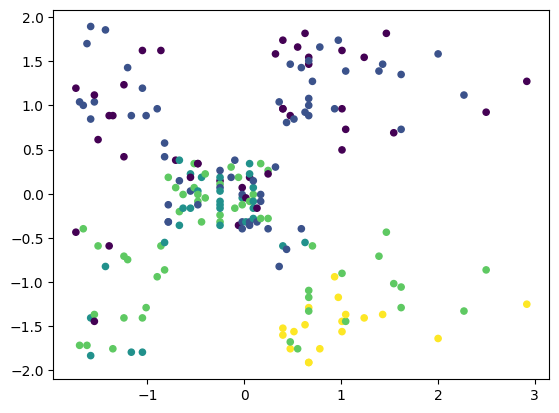

In [ ]:
agg_clustering = AgglomerativeClustering(n_clusters=5).fit(X_scaled)
y_agg = agg_clustering.labels_

plt.scatter(X_flat.Income, X_flat.Score, c=y_agg, s=20, cmap='viridis')

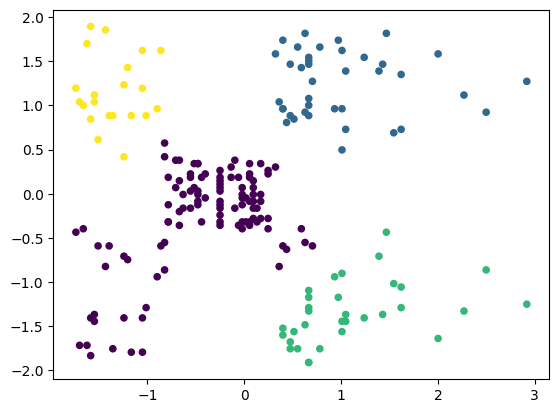

In [ ]:
agg_clustering = AgglomerativeClustering(n_clusters=4).fit(X_flat)
y_agg = agg_clustering.labels_

plt.scatter(X_flat.Income, X_flat.Score, c=y_agg, s=20, cmap='viridis')

## DBSCAN
Он оценивает плотность расположения точек в окрестностях заданной.
У конструктора данного класса два обязательных аргумента: eps - максимальный радиус вокруг точки, попадание в который считается соседством; и min_samples - количество соседних точек, которых достаточно для признания данной точки внутренней. Оба параметра оказывают существенное влияние на результат кластеризации. Они подбираются эмпирически.

Обычно, эмпирический выбора гиперпараметров модели обучения опирается на значение метрики качества. Так мы делали в предыдущем пункте, в методе локтя. Но сейчас покажем другой подход. Можно мониторить количество кластеров и точек шума, которые определяет алгоритм при данных значениях гиперпараметров.

In [ ]:
from sklearn.cluster import DBSCAN

db = DBSCAN(eps=0.4, min_samples=3).fit(X_flat)
y_db = db.labels_

In [ ]:
n_clusters_ = len(set(y_db)) - (1 if -1 in y_db else 0)
n_noise_ = list(y_db).count(-1)

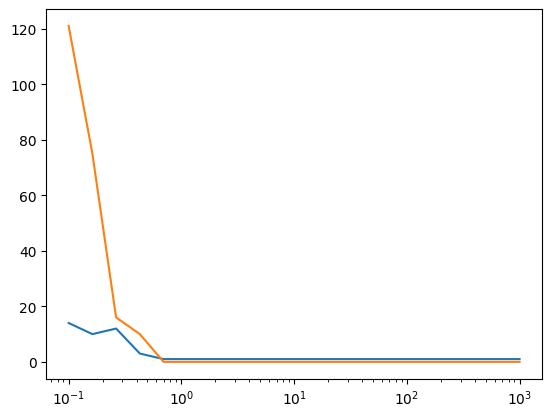

In [ ]:
clusters, noise = [], []
for i in np.logspace(-1, 3, 20):
  db = DBSCAN(eps=i, min_samples=3).fit(X_flat)
  y_db = db.labels_

  clusters.append(len(set(y_db)) - (1 if -1 in y_db else 0))
  noise.append(list(y_db).count(-1))

plt.plot(np.logspace(-1, 3, 20),clusters)
plt.plot(np.logspace(-1, 3, 20),noise)
plt.xscale('log')
_ = plt.show()

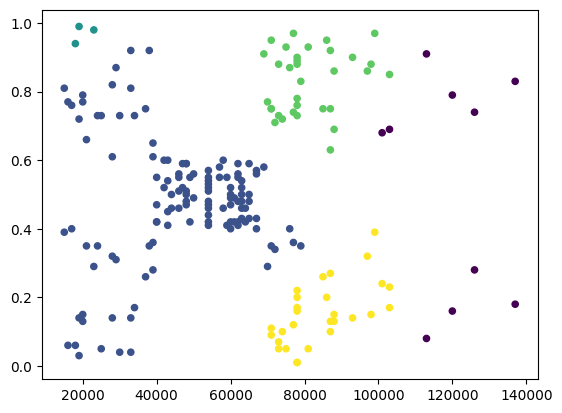

In [ ]:
db = DBSCAN(eps=0.4, min_samples=3).fit(X_flat)
y_db = db.labels_

plt.scatter(X.Income, X.Score, c=y_db, s=20, cmap='viridis')

## В задании на DBSCAN вычислите метрику WCSS и соотнесите результаты кластеризации через DBSCAN и К-средних.

In [ ]:
def compute_pseudo_wcss(X, labels):
    wcss = 0
    unique_labels = set(labels)
    unique_labels.discard(-1)  # убрать шум (если есть)
    for label in unique_labels:
        cluster_points = X[labels == label]
        center = cluster_points.mean(axis=0)
        distances = np.linalg.norm(cluster_points - center, axis=1)
        wcss += np.sum(distances ** 2)
    return wcss

# DBSCAN псевдо-WCSS
db = DBSCAN(eps=0.4, min_samples=3).fit(X_flat)
y_db = db.labels_
dbscan_wcss = compute_pseudo_wcss(X_flat.values, y_db)
print(f"DBSCAN WCSS: {dbscan_wcss:.2f}")

# KMeans WCSS (на тех же данных, 5 кластеров для сопоставимости)
k_means = KMeans(n_clusters=5, random_state=42).fit(X_flat)
y_kmeans = k_means.labels_
kmeans_wcss = k_means.inertia_
print(f"KMeans WCSS: {kmeans_wcss:.2f}")

DBSCAN WCSS: 128.74
KMeans WCSS: 65.57


## Постройте кривые WCSS в зависимости от параметров DBSCAN.

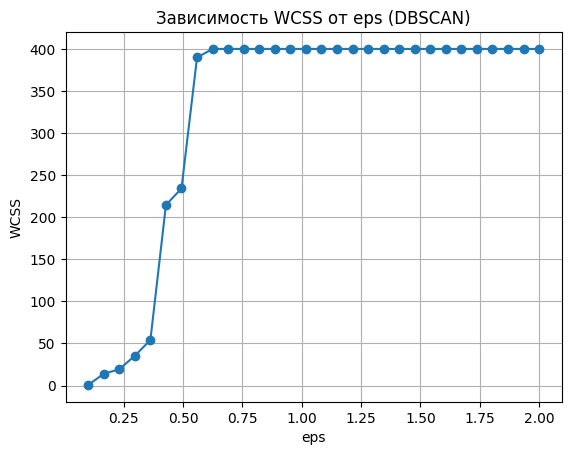

In [ ]:
# eps (эпсилон, радиус)

# Это радиус окружности вокруг точки.
# DBSCAN ищет соседей точки в пределах eps.

# Если eps слишком маленький - много точек окажутся одинокими, то есть шумом (-1).
# Если eps слишком большой - кластеры могут сливаться в один.

eps_values = np.linspace(0.1, 2.0, 30)
wcss_dbscan = []

for eps in eps_values:
    db = DBSCAN(eps=eps, min_samples=3).fit(X_flat)
    labels = db.labels_

    # Считаем псевдо-WCSS
    if len(set(labels)) - (1 if -1 in labels else 0) > 0:
        wcss = compute_pseudo_wcss(X_flat.values, labels)
    else:
        wcss = np.nan  # если все точки — шум
    wcss_dbscan.append(wcss)

plt.plot(eps_values, wcss_dbscan, marker='o')
plt.xlabel('eps')
plt.ylabel('WCSS')
plt.title('Зависимость WCSS от eps (DBSCAN)')
plt.grid(True)
plt.show()


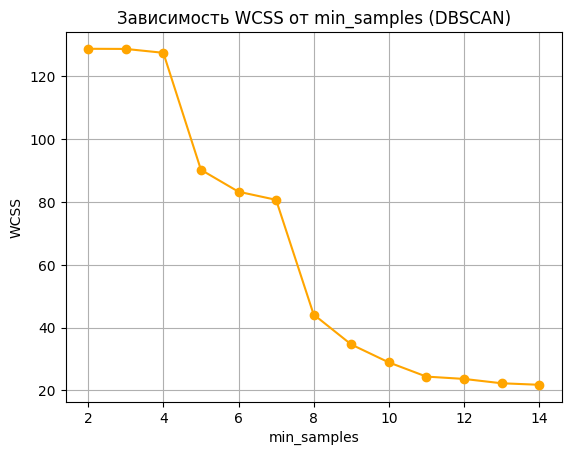

In [ ]:
# min_samples (минимум соседей)

# Это минимальное количество точек, которые должны быть в пределах eps, чтобы точку считать ядром кластера.

# Если min_samples слишком маленький, кластеризация будет слишком чувствительной к шуму.
# Если min_samples большой — DBSCAN будет требовать больше плотности, чтобы сформировать кластер.


min_samples_range = range(2, 15)
wcss_min_samples = []

for ms in min_samples_range:
    db = DBSCAN(eps=0.4, min_samples=ms).fit(X_flat)
    labels = db.labels_

    if len(set(labels)) - (1 if -1 in labels else 0) > 0:
        wcss = compute_pseudo_wcss(X_flat.values, labels)
    else:
        wcss = np.nan
    wcss_min_samples.append(wcss)

plt.plot(min_samples_range, wcss_min_samples, marker='o', color='orange')
plt.xlabel('min_samples')
plt.ylabel('WCSS')
plt.title('Зависимость WCSS от min_samples (DBSCAN)')
plt.grid(True)
plt.show()


# Для самостоятотельного решения
- Для придания смысла кластерам выведите примеры точек выборки для каждого кластера. Сделайте вывод, чем они отличаются.
- Используйте для визуализации результатов кластеризации другие пары признаков. Сделайте вывод о зависимости кластеризации от признаков.
- Повторите весь анализ для другого датасета - кластеризации кредитных карт.
- В задании на иерархическую кластеризацию используйте разные методы расчета расстояния между кластерами. Сделайте выводы.
- В задании на DBSCAN вычислите метрику WCSS и соотнесите результаты кластеризации через DBSCAN и К-средних.
- Постройте кривые WCSS в зависимости от параметров DBSCAN.

## Повторите весь анализ для другого датасета - кластеризации кредитных карт.

In [ ]:
from sklearn import datasets
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import confusion_matrix, f1_score, accuracy_score

df = pd.read_csv('credit_card_clustering.csv')
df.head()




,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,C10001,40.900749,0.818182,95.40,0.00,95.4,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12
1,C10002,3202.467416,0.909091,0.00,0.00,0.0,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12
2,C10003,2495.148862,1.000000,773.17,773.17,0.0,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12
3,C10004,1666.670542,0.636364,1499.00,1499.00,0.0,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,NaN,0.000000,12
4,C10005,817.714335,1.000000,16.00,16.00,0.0,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12


In [ ]:
print(df.columns)

Index(['CUST_ID', 'BALANCE', 'BALANCE_FREQUENCY', 'PURCHASES',
       'ONEOFF_PURCHASES', 'INSTALLMENTS_PURCHASES', 'CASH_ADVANCE',
       'PURCHASES_FREQUENCY', 'ONEOFF_PURCHASES_FREQUENCY',
       'PURCHASES_INSTALLMENTS_FREQUENCY', 'CASH_ADVANCE_FREQUENCY',
       'CASH_ADVANCE_TRX', 'PURCHASES_TRX', 'CREDIT_LIMIT', 'PAYMENTS',
       'MINIMUM_PAYMENTS', 'PRC_FULL_PAYMENT', 'TENURE'],
      dtype='object')


In [ ]:
df = df.drop('CUST_ID', axis=1)

# Заполним пропуски, если есть
df = df.dropna()

# One-hot encoding для категориальных признаков (если есть)
X = pd.get_dummies(df)


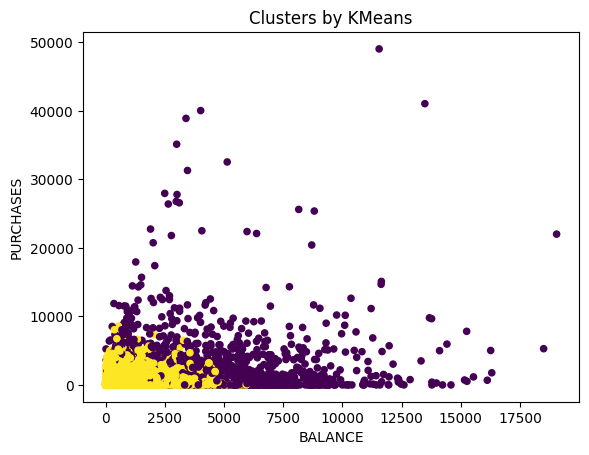

In [ ]:
from sklearn.cluster import KMeans

k_means = KMeans(n_clusters=2, random_state=42).fit(X)
y_kmeans = k_means.labels_

plt.scatter(X['BALANCE'], X['PURCHASES'], c=y_kmeans, s=20, cmap='viridis')
plt.xlabel("BALANCE")
plt.ylabel("PURCHASES")
plt.title("Clusters by KMeans")
plt.show()



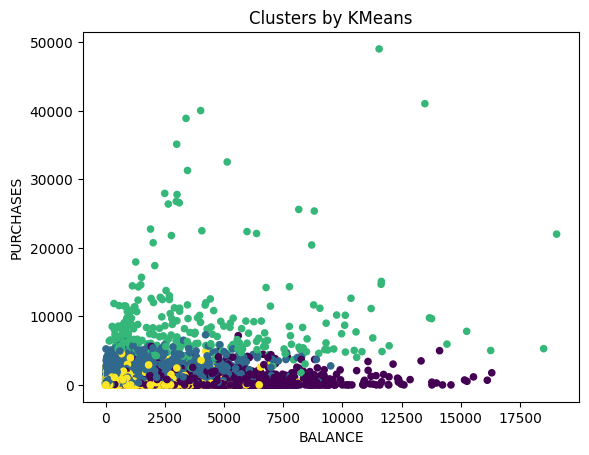

In [ ]:
 from sklearn.preprocessing import StandardScaler

scaler = StandardScaler().fit(X)
X_scaled = scaler.transform(X)
X_scaled = pd.DataFrame(X_scaled, columns=X.columns)

k_means = KMeans(n_clusters=4, random_state=42).fit(X_scaled)
y_kmeans = k_means.labels_

plt.scatter(X['BALANCE'], X['PURCHASES'], c=y_kmeans, s=20, cmap='viridis')
plt.xlabel("BALANCE")
plt.ylabel("PURCHASES")
plt.title("Clusters by KMeans")
plt.show()

## В задании на иерархическую кластеризацию используйте разные методы расчета расстояния между кластерами. Сделайте выводы.


=== Метод: WARD ===


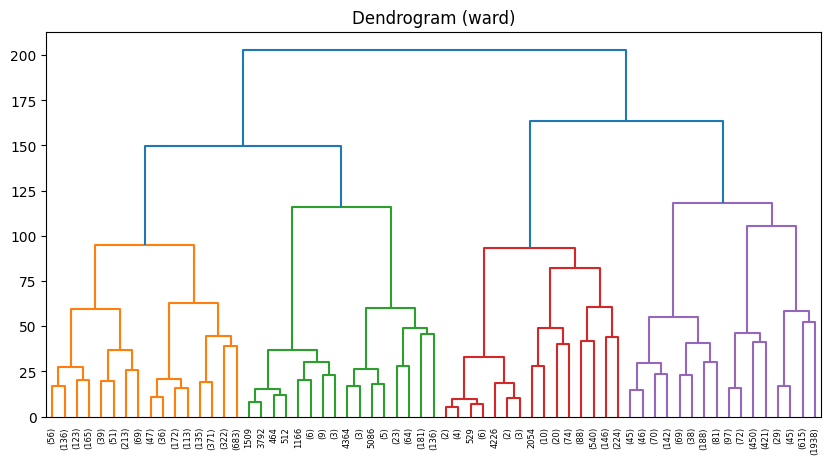


=== Метод: COMPLETE ===


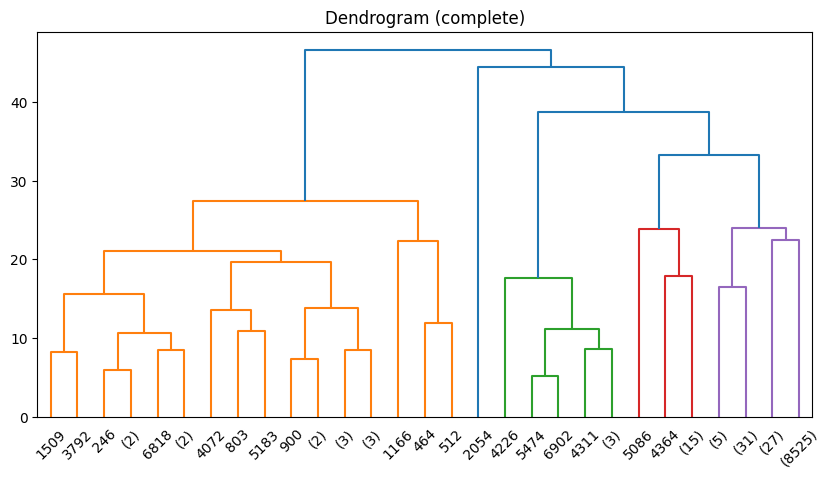


=== Метод: AVERAGE ===


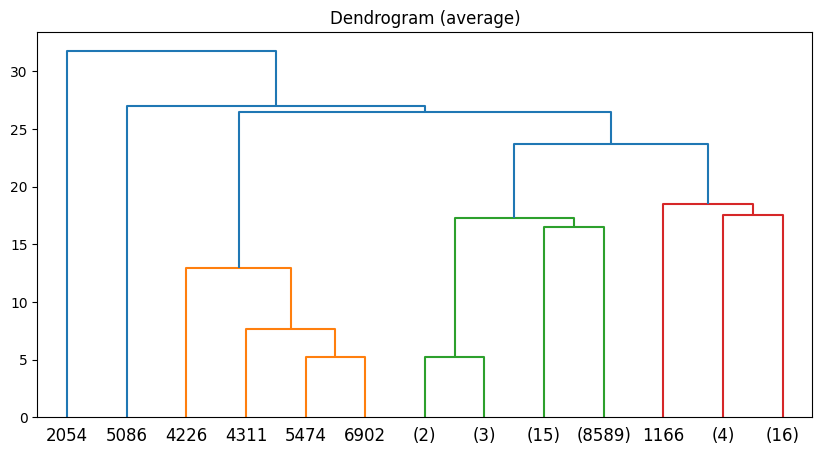


=== Метод: SINGLE ===


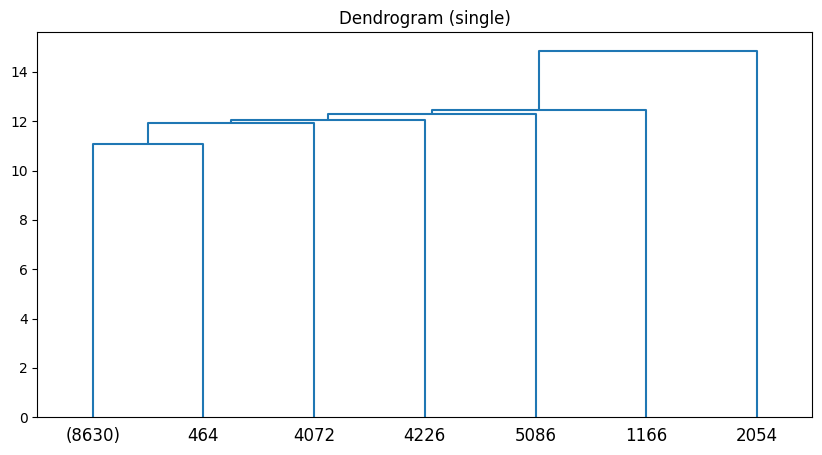

In [ ]:
# ward - Минимизирует увеличение дисперсии (сумма квадратов отклонений) при объединении кластеров
# single - Минимальное расстояние между двумя точками из разных кластеров
# complete - Максимальное расстояние между двумя точками из разных кластеров
# average - Среднее расстояние между всеми парами точек из двух кластеров

# ward — предпочитает сферические кластеры (оптимально для KMeans-подобных случаев).
# complete — склонен к более равномерным кластерам, но может "растягивать".
# single — часто даёт цепочки (slinky эффект, аккуратно).
# average — компромиссный вариант.

from sklearn.cluster import AgglomerativeClustering


def plot_dendrogram(model, **kwargs):
    counts = np.zeros(model.children_.shape[0])
    n_samples = len(model.labels_)
    for i, merge in enumerate(model.children_):
        current_count = 0
        for child_idx in merge:
            if child_idx < n_samples:
                current_count += 1
            else:
                current_count += counts[child_idx - n_samples]
        counts[i] = current_count

    linkage_matrix = np.column_stack(
        [model.children_, model.distances_, counts]
    ).astype(float)

    dendrogram(linkage_matrix, **kwargs)

linkage_methods = ['ward', 'complete', 'average', 'single']

for method in linkage_methods:
    print(f"\n=== Метод: {method.upper()} ===")
    model = AgglomerativeClustering(distance_threshold=0, n_clusters=None, linkage=method)
    model = model.fit(X_scaled)

    plt.figure(figsize=(10, 5))
    plt.title(f"Dendrogram ({method})")
    plot_dendrogram(model, truncate_mode="level", p=5)
    plt.show()



=== Визуализация кластеров: WARD ===


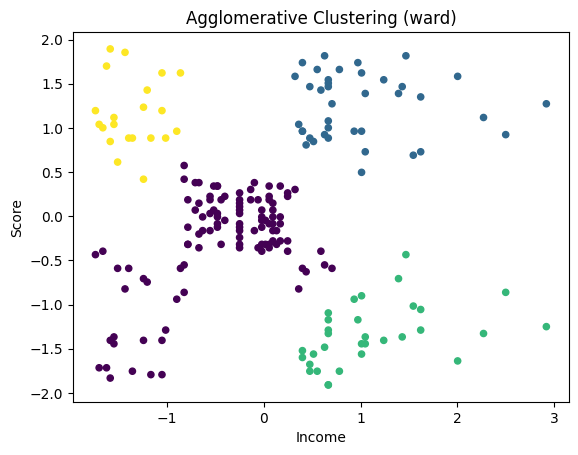


=== Визуализация кластеров: COMPLETE ===


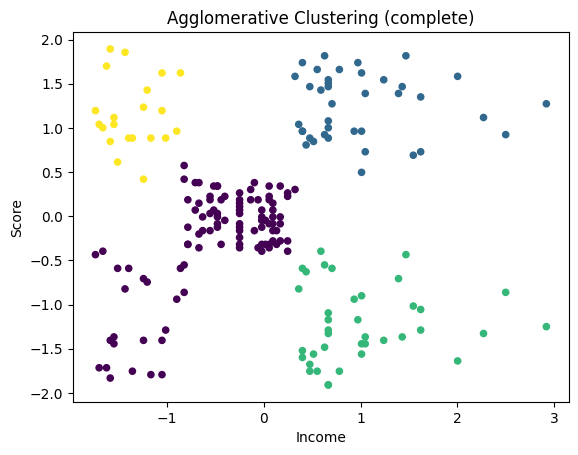


=== Визуализация кластеров: AVERAGE ===


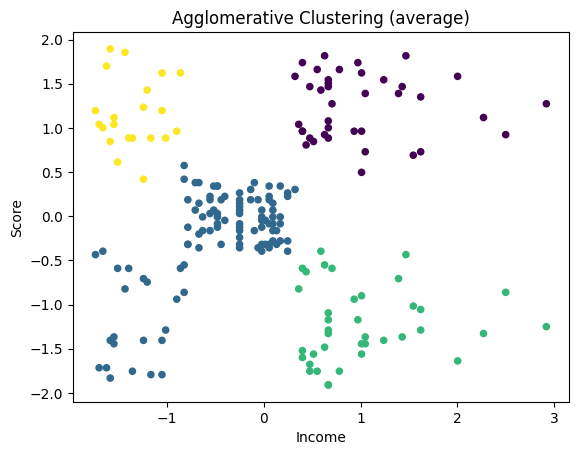


=== Визуализация кластеров: SINGLE ===


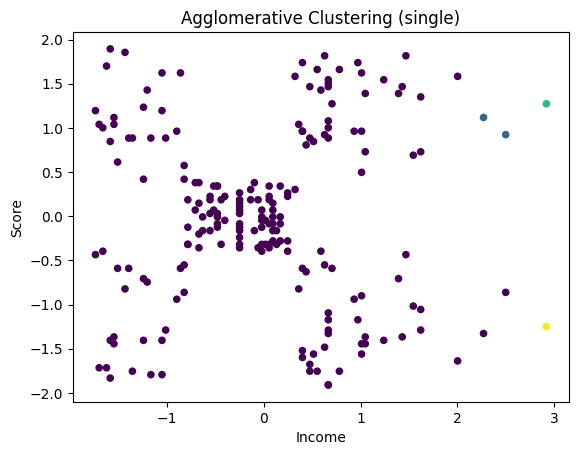

In [ ]:
 for method in linkage_methods:
    print(f"\n=== Визуализация кластеров: {method.upper()} ===")
    model = AgglomerativeClustering(n_clusters=4, linkage=method)
    y_agg = model.fit_predict(X_flat)

    plt.figure()
    plt.scatter(X_flat['Income'], X_flat['Score'], c=y_agg, s=20, cmap='viridis')
    plt.title(f"Agglomerative Clustering ({method})")
    plt.xlabel("Income")
    plt.ylabel("Score")
    plt.show()


In [ ]:
from sklearn.metrics import pairwise_distances_argmin_min

# DBSCAN уже обучен
db = DBSCAN(eps=0.5, min_samples=5).fit(X_scaled)
y_db = db.labels_

# Фильтруем шум (-1)
core_samples_mask = y_db != -1
X_core = X_scaled[core_samples_mask]
labels_core = y_db[core_samples_mask]

# Считаем центры кластеров вручную
labels_unique = np.unique(labels_core)
cluster_centers = []

for label in labels_unique:
    cluster_points = X_core[labels_core == label]
    center = np.mean(cluster_points, axis=0)
    cluster_centers.append(center)

cluster_centers = np.array(cluster_centers)

# Для каждой точки находим ближайший центр и считаем сумму квадратов расстояний
closest_centers, dists = pairwise_distances_argmin_min(X_core, cluster_centers)
wcss_dbscan = np.sum(dists ** 2)

print("WCSS для DBSCAN (без учёта шумов):", wcss_dbscan)


WCSS для DBSCAN (без учёта шумов): 2625.7267270167754
